In [ ]:
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
num_class= 10

In [ ]:
(train_X,train_Y),(test_X,test_Y)= keras.datasets.mnist.load_data()

In [ ]:
print(train_X.shape,test_X.shape, train_Y.shape,  test_Y.shape)  #data store as batchsize, width, height where as in pytoruch it store as witdth, height,batchize

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


[5 0 4 ... 5 6 8]
(28, 28)


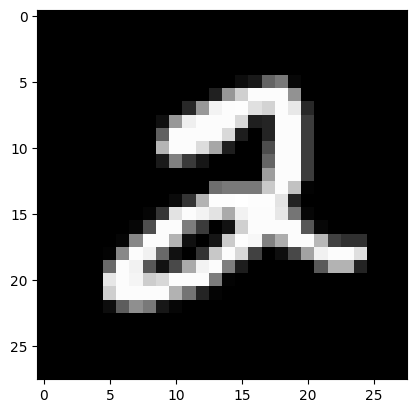

In [ ]:
example = train_X[5]
print(train_Y)
plt.imshow(example, cmap='gray')
print(example.shape)

In [ ]:
print(example.max(),example.min() )

255 0


In [ ]:
train_X =train_X/255
text_X = test_X/255

In [ ]:
train_X = np.expand_dims(train_X,-1)
test_X = np.expand_dims(test_X,-1)

In [ ]:
print(train_X.shape)

(60000, 28, 28, 1)


In [ ]:
train_Y[0]

5

In [ ]:
train_Y= keras.utils.to_categorical(train_Y) #utlise found the no. of unique wale
test_Y= keras.utils.to_categorical(test_Y)

In [ ]:
train_Y[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
img_shape = (28,28,1)

In [ ]:
model = keras.Sequential([
    keras.Input(shape=img_shape),
    keras.layers.Conv2D(66, kernel_size=(3,3), strides = (2,2), padding ='valid', activation='relu' ),
    keras.layers.MaxPool2D(pool_size = (3,3),strides = (1,1), padding = 'same' ),
    keras.layers.Conv2D(120, kernel_size=(3,3), strides = (2,2), padding ='valid', activation='relu' ),
    keras.layers.MaxPool2D(pool_size = (3,3),strides = (1,1), padding = 'same' ),
    keras.layers.Conv2D(240, kernel_size=(3,3), strides = (2,2), padding ='valid', activation='relu' ),
    keras.layers.MaxPool2D(pool_size = (3,3),strides = (1,1), padding = 'same' ),
    keras.layers.Flatten(),
    keras.layers.Dense(500, activation = 'relu'),
    keras.layers.Dense (num_class, activation='softmax')

])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 13, 13, 66)        660       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 66)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 6, 6, 120)         71400     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 120)         0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 2, 2, 240)         259440    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 240)         0

In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(), metrics=[tf.keras.metrics.CategoricalAccuracy()])
history = model.fit(train_X, train_Y, batch_size=100, epochs=10, validation_data=(test_X, test_Y))


Epoch 1/10
600/600 [==============================] - 100s 164ms/step - loss: 0.2518 - categorical_accuracy: 0.9180 - val_loss: 12.2367 - val_categorical_accuracy: 0.9769
Epoch 2/10
600/600 [==============================] - 96s 161ms/step - loss: 0.0613 - categorical_accuracy: 0.9810 - val_loss: 15.3689 - val_categorical_accuracy: 0.9714
Epoch 3/10
600/600 [==============================] - 101s 168ms/step - loss: 0.0434 - categorical_accuracy: 0.9863 - val_loss: 21.1397 - val_categorical_accuracy: 0.9647
Epoch 4/10
600/600 [==============================] - 95s 159ms/step - loss: 0.0344 - categorical_accuracy: 0.9889 - val_loss: 38.9063 - val_categorical_accuracy: 0.9412
Epoch 5/10
600/600 [==============================] - 94s 157ms/step - loss: 0.0293 - categorical_accuracy: 0.9904 - val_loss: 106.8956 - val_categorical_accuracy: 0.8578
Epoch 6/10
600/600 [==============================] - 96s 160ms/step - loss: 0.0238 - categorical_accuracy: 0.9923 - val_loss: 248.2449 - val_categ

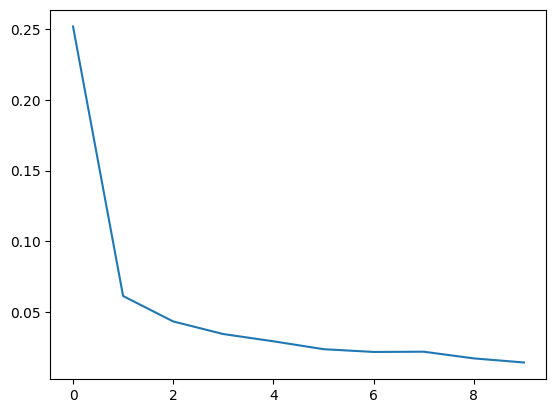

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [ ]:
model.evaluate(test_X, test_Y)

313/313 [==============================] - 4s 14ms/step - loss: 192.3109 - categorical_accuracy: 0.8447


[192.31094360351562, 0.8446999788284302]

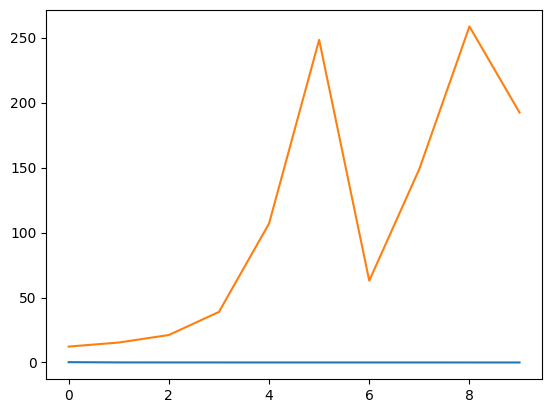

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
(28, 28, 1)
(1, 28, 28, 1)
1/1 [==============================] - 0s 124ms/step
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]] 7


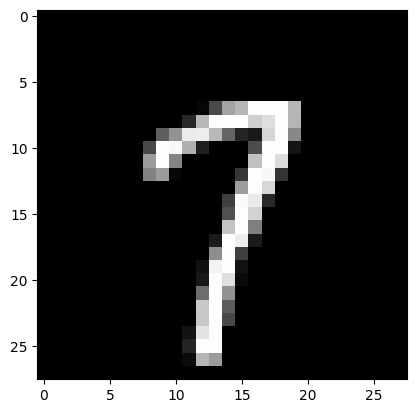

In [ ]:
example = test_X[666]
print(test_Y[666])
plt.imshow(example, cmap='gray')
print(example.shape)
example = np.expand_dims(example,0)
print(example.shape)
pred=model.predict(example)
print(pred,np.argmax(pred))